In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!git clone https://github.com/Vedantkumar123/Paint_finishing_detection.git


Cloning into 'Paint_finishing_detection'...


In [5]:
%cd /content/drive/MyDrive/Colab_Notebooks/Machine_finishing


/content/drive/MyDrive/Colab_Notebooks/Machine_finishing


In [6]:
!git init


hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/.git/


In [7]:
!echo "Machine_finishing_detection" >> README.md


In [8]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	Paint_finishing_detection.ipynb
	README.md
	Test_images_new/
	model_V1/
	model_V2/
	model_V3/
	runs/
	stitched_bboxes.txt
	stitched_image.jpg

nothing added to commit but untracked files present (use "git add" to track)


In [3]:
import os
os.getcwd()

'/content'

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2

/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2


In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2'

# lOAD ROBOFLOW DATASET


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="u8Ur5ywKLswqwt0uMTXl")
# project = rf.workspace("machinerydetection").project("finishing_detection")
# version = project.version(2)
# dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to finishing_detection-2 in yolov8:: 100%|██████████| 548/548 [00:06<00:00, 84.99it/s]


In [ ]:
!pip install roboflow -q

from roboflow import Roboflow
rf = Roboflow(api_key="u8Ur5ywKLswqwt0uMTXl")
project = rf.workspace("machinerydetection").project("finishing_detection")
version = project.version(3)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.92, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to finishing_detection-3 in yolov8:: 100%|██████████| 574/574 [00:06<00:00, 87.82it/s]


# TRAIN THE MODEL

In [2]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.4/881.4 kB 22.7 MB/s eta 0:00:00


In [ ]:

from ultralytics import YOLO

# Load a model
# model = YOLO("yolov8n.yaml")  # build a new model from YAML
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)
model = YOLO("yolov8n.yaml").load("yolov8n.pt")  # build from YAML and transfer weights
data_path="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/data.yaml"
custom_runs_path = "/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs"  # Desired path for the runs folder

# Train the model
results = model.train(data=data_path, epochs=10, imgsz=640,project=custom_runs_path)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs, name=train, exist_ok=False, pretrained=yolov8n.pt, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augmen

train: Scanning /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/train/labels.cache... 249 images, 0 backgrounds, 0 corrupt: 100%|██████████| 249/249 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]


Plotting labels to /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.64G      1.199      2.962       1.52         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.65it/s]

                   all         22         42    0.00633          1      0.592      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.25G     0.6752      1.555      1.136         19        640: 100%|██████████| 16/16 [00:04<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.54it/s]

                   all         22         42          1       0.65      0.961      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.25G     0.6892      1.209       1.08         16        640: 100%|██████████| 16/16 [00:07<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

                   all         22         42          1      0.827       0.99      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.25G     0.6564      1.068      1.087         16        640: 100%|██████████| 16/16 [00:07<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.31it/s]

                   all         22         42      0.807      0.857      0.898       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.25G     0.6513      1.052      1.093         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         22         42      0.979      0.967      0.992      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.25G     0.5869      0.947      1.047         17        640: 100%|██████████| 16/16 [00:06<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

                   all         22         42      0.995      0.943      0.989      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.25G     0.5727     0.8848       1.04         17        640: 100%|██████████| 16/16 [00:07<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         22         42      0.825      0.868      0.935      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.25G     0.5792     0.8614      1.013         18        640: 100%|██████████| 16/16 [00:04<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.68it/s]

                   all         22         42      0.987      0.974      0.993      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.25G     0.5254     0.7701      1.002         15        640: 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.67it/s]

                   all         22         42      0.923      0.999      0.974      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.25G     0.5003     0.7573     0.9634         19        640: 100%|██████████| 16/16 [00:07<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         22         42      0.926          1      0.989      0.895



10 epochs completed in 0.031 hours.
Optimizer stripped from /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt...
Ultralytics YOLOv8.2.92 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.38it/s]


                   all         22         42      0.926          1      0.989      0.895
          Non_primered         10         17      0.855          1      0.983      0.884
              Primered         12         25      0.997          1      0.995      0.905
Speed: 0.5ms preprocess, 3.1ms inference, 0.0ms loss, 4.0ms postprocess per image
Results saved to /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train


In [5]:
from ultralytics import YOLO
model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt")
# model.predict("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v1/Test_02.00.jpg")

In [6]:
metrics = model.val()  # no arguments needed, dataset and settings remembered
# metrics.box.map  # map50-95
# metrics.box.map50  # map50
# metrics.box.map75  # map75
# metrics.box.maps

Ultralytics 8.3.2 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 22.8MB/s]
val: Scanning /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/valid/labels.cache... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:09<00:00,  4.98s/it]


                   all         22         42      0.927          1      0.989      0.896
          Non_primered         10         17      0.856          1      0.983      0.887
              Primered         12         25      0.997          1      0.995      0.905
Speed: 0.4ms preprocess, 17.4ms inference, 0.0ms loss, 72.0ms postprocess per image
Results saved to runs/detect/val2


# **FEATURE MAP VISUALISATION**

In [ ]:
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
        (act): SiLU(inplace=True)
      )
      (m): ModuleList(
        (0): Bottleneck(
          (cv1): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
            (act): SiLU(inplace=True)
          )
        )
      )
    )
    (3): Conv(
      (conv): Conv2d(32

In [ ]:
import numpy as np
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from PIL import Image
model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V1/runs/detect/train3/weights/best.pt")
# Sample input image
input_image = '/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v2/Test_01.00.jpg'
input_image = Image.open(input_image)

transform = transforms.Compose([transforms.Resize((640, 640)),
                                transforms.ToTensor()])
# print(transform(input_image).unsqueeze(0).shape)
input_tensor = transform(input_image).unsqueeze(0)
def get_feature_maps(layer, input, output):
    global feature_maps
    print(layer)
    feature_maps = output
handle = model.model.model[3].register_forward_hook(get_feature_maps)  # Register hook for the first conv layer
output = model(input_tensor)
print(feature_maps.shape)


Conv(
  (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
)
0: 640x640 2 Non_primereds, 584.6ms
Speed: 0.0ms preprocess, 584.6ms inference, 18.4ms postprocess per image at shape (1, 3, 640, 640)
torch.Size([1, 64, 80, 80])


In [ ]:
print(model.model.model)

Sequential(
  (0): Conv(
    (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (act): SiLU(inplace=True)
  )
  (1): Conv(
    (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (act): SiLU(inplace=True)
  )
  (2): C2f(
    (cv1): Conv(
      (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
      (act): SiLU(inplace=True)
    )
    (cv2): Conv(
      (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1))
      (act): SiLU(inplace=True)
    )
    (m): ModuleList(
      (0): Bottleneck(
        (cv1): Conv(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
      )
    )
  )
  (3): Conv(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (act): SiLU(inplace=True)
  )


torch.Size([1, 3, 640, 640])

0: 640x640 1 Non_primered, 1 Primered, 387.7ms
Speed: 0.1ms preprocess, 387.7ms inference, 10.3ms postprocess per image at shape (1, 3, 640, 640)
(20, 20)


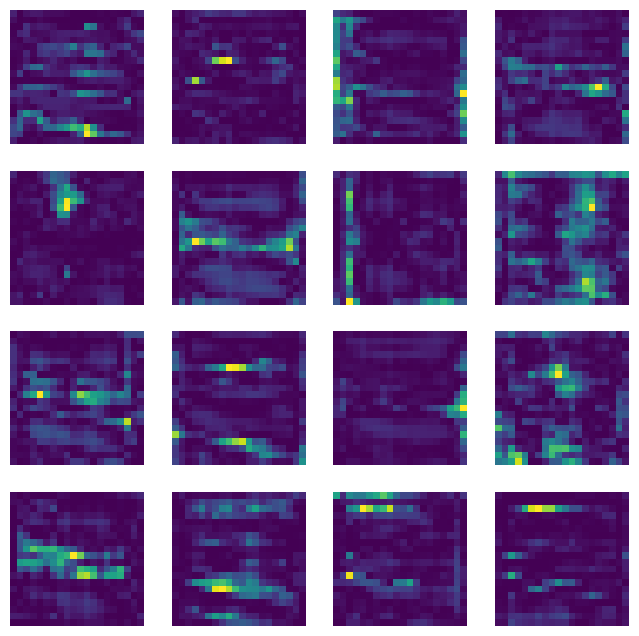

In [ ]:
import numpy as np
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from PIL import Image
model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt")
# Sample input image
input_image = '/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v2/Test_01.00.jpg'
input_image = Image.open(input_image)

transform = transforms.Compose([transforms.Resize((640, 640)),
                                transforms.ToTensor()])

input_tensor = transform(input_image).unsqueeze(0)  # Add batch dimension
print(input_tensor.shape)
# Hook to get the output of a specific layer
def get_feature_maps(layer, input, output):
    global feature_maps

    feature_maps = output

handle = model.model.model[21].register_forward_hook(get_feature_maps)  # Register hook for the first conv layer
# Forward pass
model(input_tensor)

# Detach handle after extraction
handle.remove()

# Visualize feature maps
plt.figure(figsize=(8, 8))
print(feature_maps[0, 0, :40, :40].cpu().detach().numpy().shape)
for i in range(min(feature_maps.shape[1], 16)):  # Visualize up to 16 feature maps
    plt.subplot(4, 4, i + 1)
    # plt.imshow(feature_maps[0, i, :, :].cpu().detach().numpy(), cmap='gray')
    plt.imshow(feature_maps[0, i, :, :].cpu().detach().numpy())
    plt.axis('off')
plt.show()


0: 640x640 1 Non_primered, 1 Primered, 341.8ms
Speed: 0.0ms preprocess, 341.8ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)
torch.Size([1, 256, 20, 20])


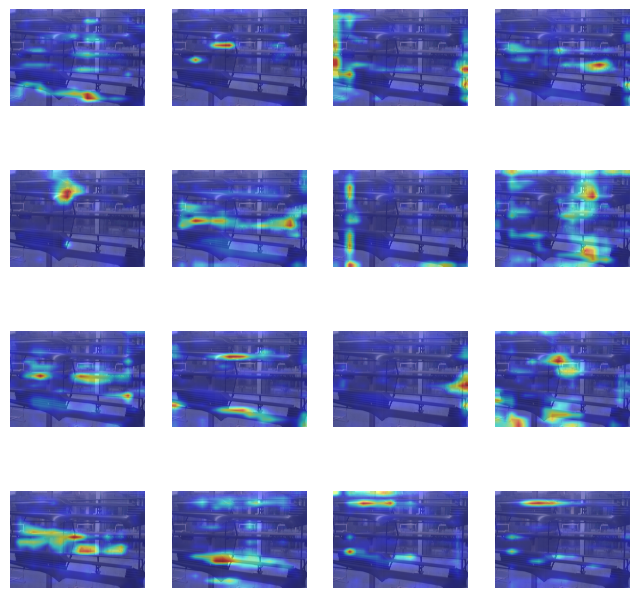

In [ ]:
import cv2
def overlay_heatmap(original_image, heatmap, alpha=0.5):
    heatmap_resized = cv2.resize(heatmap, (original_image.size[0], original_image.size[1]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)  # Convert to RGB
    overlayed_image = cv2.addWeighted(np.array(original_image), 1 - alpha, heatmap_colored, alpha, 0)
    return overlayed_image
org_path="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v2/Test_01.00.jpg"
original_image=Image.open(org_path)
handle = model.model.model[21].register_forward_hook(get_feature_maps)  # Register hook for the first conv layer

model(input_tensor)

handle.remove()
plt.figure(figsize=(8, 8))
print(feature_maps.shape)
for i in range(min(feature_maps.shape[1], 16)):  # Visualize up to 16 feature maps
    plt.subplot(4, 4, i + 1)
    # plt.imshow(feature_maps[0, i, :, :].cpu().detach().numpy(), cmap='gray')
    selected_feature_map = feature_maps[0, i, :, :].cpu().detach().numpy()
    selected_feature_map = (selected_feature_map - np.min(selected_feature_map)) / (np.max(selected_feature_map) - np.min(selected_feature_map))  # Normalize
    roi_image = overlay_heatmap(original_image, selected_feature_map)
    plt.imshow(roi_image)
    plt.axis('off')
plt.show()


Top 10 most important feature map indices: [178 123  66 232 183 107 165  58 163 197]


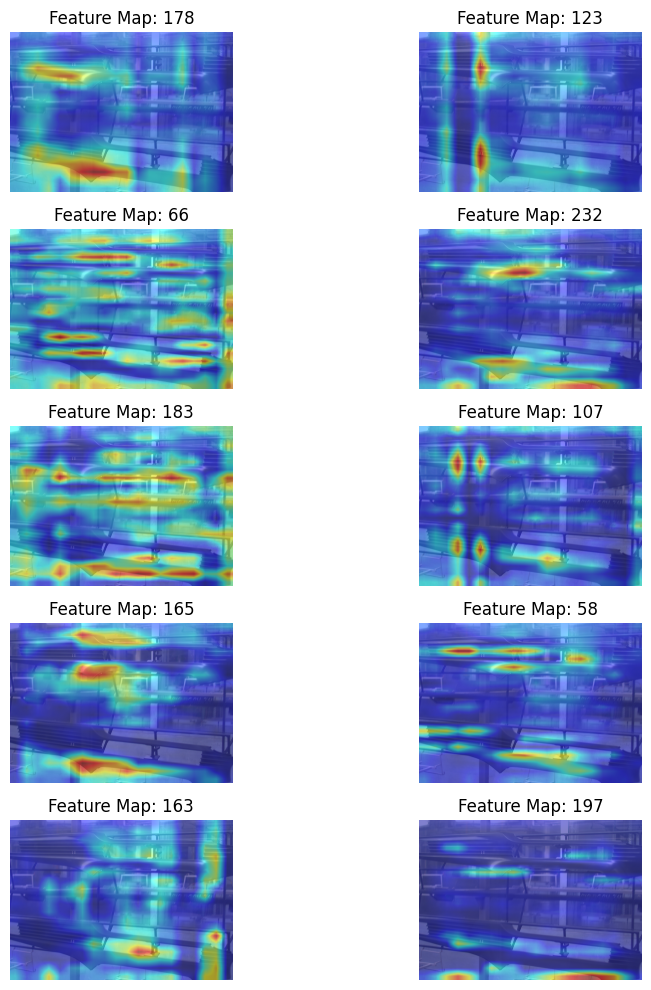

In [ ]:
total_activations = feature_maps.sum(dim=(2, 3))
top_10_map_indices = torch.argsort(total_activations, dim=1, descending=True)[0][:10].cpu().numpy()

print("Top 10 most important feature map indices:", top_10_map_indices)
plt.figure(figsize=(10, 10))
for idx, map_index in enumerate(top_10_map_indices):
    plt.subplot(5, 2, idx + 1)
    selected_feature_map = feature_maps[0, map_index, :, :].cpu().detach().numpy()
    selected_feature_map = (selected_feature_map - np.min(selected_feature_map)) / (np.max(selected_feature_map) - np.min(selected_feature_map))  # Normalize
    roi_image = overlay_heatmap(original_image, selected_feature_map)
    plt.imshow(roi_image)
    plt.axis('off')
    plt.title(f'Feature Map: {map_index}')

plt.tight_layout()
plt.show()

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import os
from matplotlib.animation import FuncAnimation

# Function to overlay heatmap on the original image
def overlay_heatmap(original_image, heatmap, alpha=0.5):
    heatmap_resized = cv2.resize(heatmap, (original_image.size[0], original_image.size[1]))
    heatmap_colored = cv2.applyColorMap(np.uint8(255 * heatmap_resized), cv2.COLORMAP_JET)
    heatmap_colored = cv2.cvtColor(heatmap_colored, cv2.COLOR_BGR2RGB)  # Convert to RGB
    overlayed_image = cv2.addWeighted(np.array(original_image), 1 - alpha, heatmap_colored, alpha, 0)
    return overlayed_image

# Load the original image
org_path = "/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v1/Test_02.00.jpg"
original_image = Image.open(org_path)

# Define a dictionary to store feature maps from different layers
feature_maps_by_layer = {}

# Hook function to capture feature maps from different layers
def get_feature_maps(layer_name):
    def hook(module, input, output):
        feature_maps_by_layer[layer_name] = output
    return hook

# List of layers to capture feature maps from
layer_to_capture={}
for i, layer in enumerate(model.model.model):
    if hasattr(layer, 'conv'):  # Check if the layer has a conv attribute
        layer_to_capture[layer]=f"model.model.model[{i}]"
# layers_to_capture = {
#     'conv1': model.model.model[0],  # First convolution layer
#     'layer1': model.model.model[4],  # First block of ResNet
#     'layer2': model.model.model[5],  # Second block of ResNet
#     'layer3': model.model.model[6],  # Third block of ResNet
#     'layer4': model.model.model[7],  # Fourth block of ResNet
# }
print(layer_to_capture)
# # Register hooks for each layer
# hooks = []
# for layer_name, layer in layers_to_capture.items():
#     hook = layer.register_forward_hook(get_feature_maps(layer_name))
#     hooks.append(hook)

# # Perform forward pass to get feature maps from the layers
# model(input_tensor)

# # Remove hooks after capturing the feature maps
# for hook in hooks:
#     hook.remove()

# # Directory to store the frames
# frame_dir = 'feature_map_frames'
# os.makedirs(frame_dir, exist_ok=True)

# # Prepare the frames for the video
# frame_count = 0

# for layer_name, feature_maps in feature_maps_by_layer.items():
#     print(f"Creating frames for feature maps from layer: {layer_name}")
#     for i in range(min(feature_maps.shape[1], 16)):  # Visualize up to 16 feature maps
#         selected_feature_map = feature_maps[0, i, :, :].cpu().detach().numpy()
#         selected_feature_map = (selected_feature_map - np.min(selected_feature_map)) / (np.max(selected_feature_map) - np.min(selected_feature_map))  # Normalize
#         roi_image = overlay_heatmap(original_image, selected_feature_map)

#         # Save each frame as an image
#         frame_path = os.path.join(frame_dir, f"layer_{layer_name}_map_{i}.png")
#         plt.imshow(roi_image)
#         plt.axis('off')
#         plt.title(f"Layer: {layer_name}, Map: {i}")
#         plt.savefig(frame_path)
#         plt.close()
#         frame_count += 1

# # Create a video (or GIF) from the frames
# import imageio

# frames = []
# for i in range(frame_count):
#     frame_path = os.path.join(frame_dir, f"layer_{layer_name}_map_{i}.png")
#     frames.append(imageio.imread(frame_path))

# # Save as video or gif
# output_gif = 'feature_map_evolution.gif'
# imageio.mimsave(output_gif, frames, fps=2)  # Adjust fps for speed
# print(f"Feature map evolution saved as {output_gif}")


{Conv(
  (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[0]', Conv(
  (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[1]', Conv(
  (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[3]', Conv(
  (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[5]', Conv(
  (conv): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[7]', Conv(
  (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[16]', Conv(
  (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (act): SiLU(inplace=True)
): 'model.model.model[19]'}



0: 640x640 1 Non_primered, 1 Primered, 192.8ms
Speed: 0.0ms preprocess, 192.8ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 640)


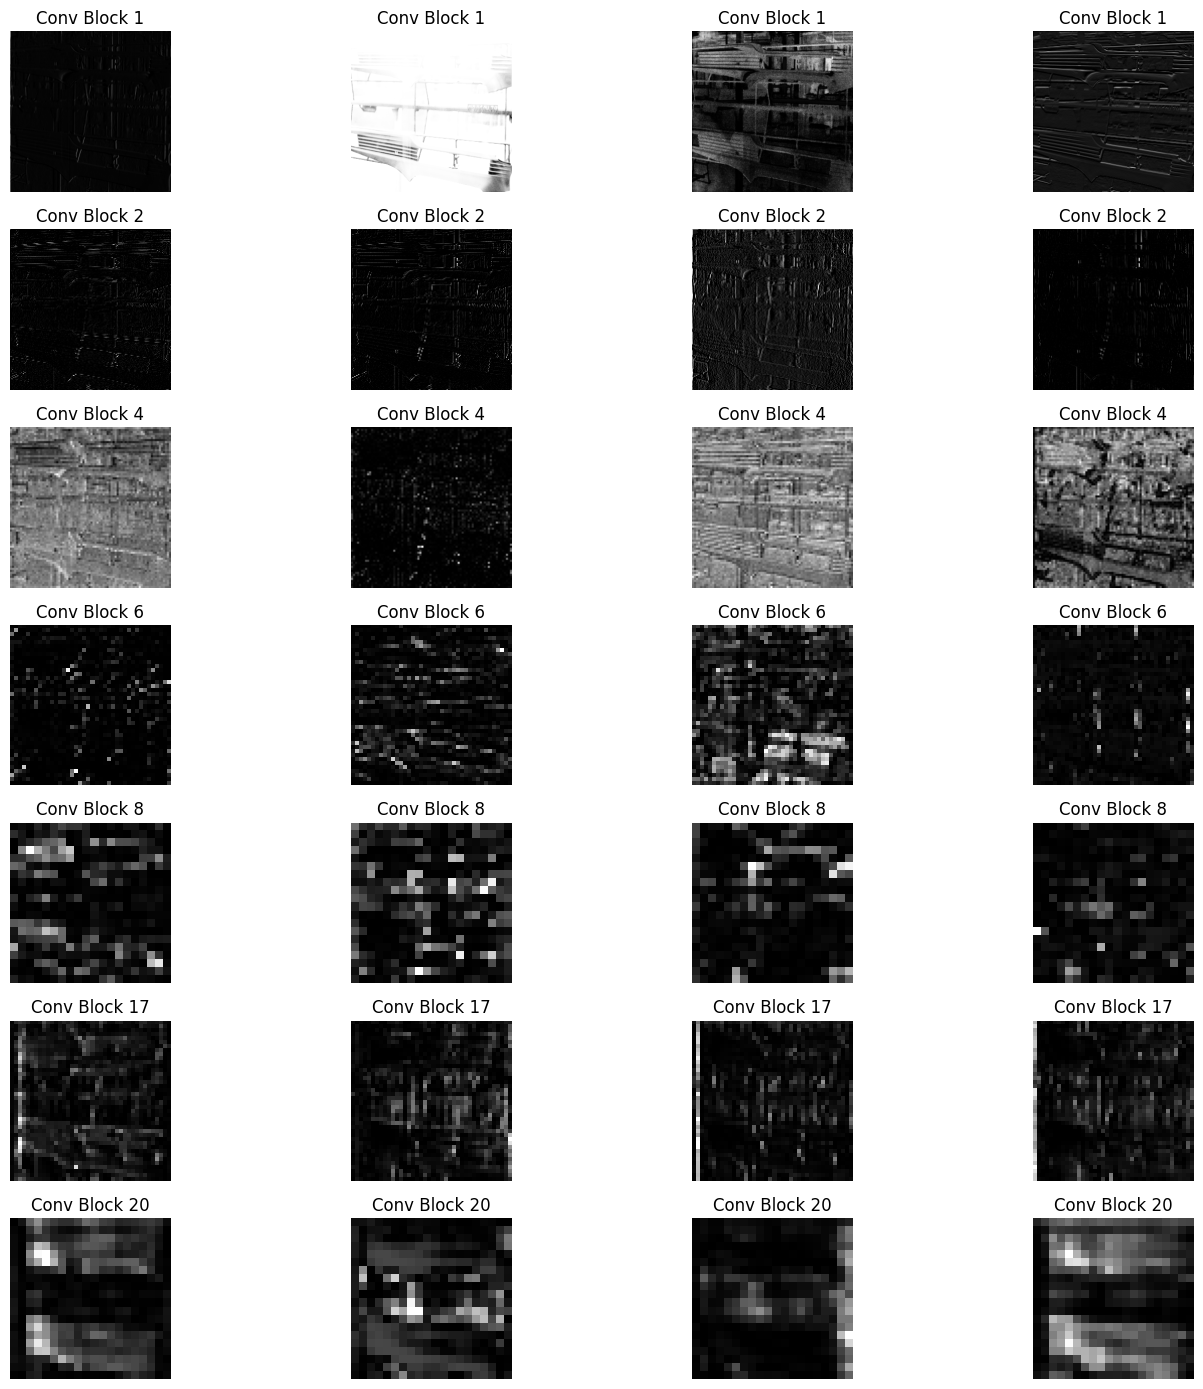

In [ ]:
import numpy as np
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO

# Load the trained YOLOv8 model
model = YOLO('/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt')

# Sample input image
input_image_path = '/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v2/Test_01.00.jpg'
input_image = Image.open(input_image_path)

transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor()
])
input_tensor = transform(input_image).unsqueeze(0)  # Add batch dimension

# List to hold feature maps and layer names
feature_maps_list = []
layer_names = []

# Hook to get the output of specific layers
def get_feature_maps(layer_name):
    def hook(module, input, output):
        feature_maps_list.append(output)
        layer_names.append(layer_name)
    return hook

# Register hooks for the convolutional layers you want to visualize
layer_hooks = []
for i, layer in enumerate(model.model.model):
    if hasattr(layer, 'conv'):  # Check if the layer has a conv attribute
        layer_hook = layer.register_forward_hook(get_feature_maps(f'Conv Block {i+1}'))
        layer_hooks.append(layer_hook)

# Forward pass
with torch.no_grad():
    model(input_tensor)

# Remove hooks
for handle in layer_hooks:
    handle.remove()

# Visualize feature maps
num_blocks = len(feature_maps_list)
plt.figure(figsize=(15, num_blocks * 2))  # Adjust figure size based on number of blocks

for idx, (feature_map, name) in enumerate(zip(feature_maps_list, layer_names)):
    for i in range(min(feature_map.shape[1], 4)):  # Visualize up to 4 feature maps per block
        plt.subplot(num_blocks, 4, idx * 4 + i + 1)
        plt.imshow(feature_map[0, i, :, :].cpu().detach().numpy(),cmap="gray")
        plt.title(name)  # Display the layer name
        plt.axis('off')

plt.tight_layout()
plt.show()


# **TEST THE MODEL**

In [ ]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.1/875.1 kB 16.7 MB/s eta 0:00:00


## LOAD THE MODEL

In [ ]:
import os
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V1/runs/detect/train3/weights/best.pt")
# model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt")
# model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/detect/train/weights/best.pt")
l=[]
# file_path="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/test/images"
# file_path="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V1/Temp_test"
file_path="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Test_images_new/v1"

for file in os.listdir(file_path):
  l.append(file_path+"/"+file)

for i in l:
  print(i)
save_folder="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/Temp_results"
results = model(l)
for i,result in enumerate(results):
    boxes = result.boxes
    img_with_boxes = result.plot()
    img_with_boxes = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)
    img_with_boxes = cv2.resize(img_with_boxes, (480, 320))
    cv2_imshow(img_with_boxes)
    print("\n \n \n")
    filename = f"result_{i}_new.jpg"
    save_path = os.path.join(save_folder, filename)
    # result.save(filename=save_path)  # save to disk

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
cd /content/drive/MyDrive/Colab_Notebooks/Machine_finishing

/content/drive/MyDrive/Colab_Notebooks/Machine_finishing


In [ ]:
from ultralytics import YOLO

# Configure the tracking parameters and run the tracker
model = YOLO("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/train/weights/best.pt")
results = model.track(source="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/video/video_1.mp4",
                      conf=0.3,
                      iou=0.5,
                      show=True,
                      save=True,  # To save the video
                      # save_path="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/video/annoted_video_1.mp4",
                      )

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/941) /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/video/video_1.mp4: 640x384 (no detections), 7.8ms
video 1/1 (frame 2/941) /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/video/video_1.mp4: 640x384 (no detections), 6.3ms
video 1/1 (frame 3/941) /content/drive/MyDrive/Colab_Noteb

## STITCHING THE BOUNDING BOXES

In [ ]:
def bounding_box_cor(class_id, center_x, center_y, box_width, box_height,img_width=640,img_height=640):
  top_left_x = int((center_x - box_width / 2) * img_width)
  top_left_y = int((center_y - box_height / 2) * img_height)
  bottom_right_x = int((center_x + box_width / 2) * img_width)
  bottom_right_y = int((center_y + box_height / 2) * img_height)
  return class_id, top_left_x, top_left_y, bottom_right_x, bottom_right_y
def stitch_bb(L,stitched_img,below,D):
    print(stitched_img.shape)
    if below==False:
        print("above")
        # D=[]
        for i in range(len(L)):
            B=[float(j) for j in L[i].split()]
            class_id,top_left_x,top_left_y,bottom_right_x,bottom_right_y=bounding_box_cor(B[0],B[1],B[2]/2,B[3],B[4])
            C=[int(class_id),top_left_x,top_left_y,bottom_right_x,bottom_right_y]
            start_point=(top_left_x,top_left_y)
            end_point=(bottom_right_x,bottom_right_y)
            cv2.rectangle(stitched_img, start_point, end_point, color=(255, 0, 0), thickness=1)
            D.append(C)
        return D
    if below==True:
        print("below")
        # D=[]
        for i in range(len(L)):
            B=[float(j) for j in L[i].split()]
            class_id,top_left_x,top_left_y,bottom_right_x,bottom_right_y=bounding_box_cor(B[0],B[1],B[2],B[3],B[4])
            top_left_y,bottom_right_y=top_left_y+640,bottom_right_y+640
            C=[int(class_id),top_left_x,top_left_y,bottom_right_x,bottom_right_y]
            start_point=(top_left_x,top_left_y)
            end_point=(bottom_right_x,bottom_right_y)
            cv2.rectangle(stitched_img, start_point, end_point, color=(255, 0, 0), thickness=1)
            D.append(C)
        return D
def bbox_center(bbox,image_width=640,image_height=640):
  class_id,x_min,y_min,x_max,y_max=bbox
  box_width=(x_max-x_min)/image_width
  box_height=(y_max-y_min)/image_height
  print(box_width,box_height)
  x_center=(x_min/image_width)+box_width/2
  y_center=(y_min/image_height)+box_height/2
  new_bbox = [class_id, x_center,y_center,box_width,box_height]
  return new_bbox


In [ ]:
def adjust_bboxes(bboxes1, bboxes2, image1_height, new_image_height):
    adjusted_bboxes1 = []
    adjusted_bboxes2 = []

    # For image1 bounding boxes (No change in x, y scaling)
    for bbox in bboxes1:
        print(bbox)
        class_id, x_center, y_center, width, height = bbox
        adjusted_bboxes1.append((class_id, x_center, y_center, width, height))

    # For image2 bounding boxes (Need to adjust x_center)
    for bbox in bboxes2:
        class_id, x_center, y_center, width, height = bbox
        # Adjust the x_center by shifting it to the right, since the second image is stitched to the right
        y_center_new = (x_center * img1.shape[0] + image1_height) / new_image_height
        adjusted_bboxes2.append((class_id, x_center, y_center_new, width, height))

    return adjusted_bboxes1 + adjusted_bboxes2

In [ ]:
for i in range(len(L_above)):
            B=[float(j) for j in L[i].split()]
new_box=adjust_bboxes(L_above,L_below,640,1280)
print(new_box)

1.0


TypeError: cannot unpack non-iterable float object

In [ ]:
for i in range(len(D)):
  print(D[i])
  n_bbox=bbox_center(D[i])
  print(n_bbox)

[1, 240, 650, 640, 879]
0.625 0.3578125
[1, 0.6875, 1.19453125, 0.625, 0.3578125]
[1, 230, 1085, 640, 1279]
0.640625 0.303125
[1, 0.6796875, 1.846875, 0.640625, 0.303125]
[1, 249, 5, 639, 223]
0.609375 0.340625
[1, 0.69375, 0.178125, 0.609375, 0.340625]
[1, 240, 443, 640, 640]
0.625 0.3078125
[1, 0.6875, 0.84609375, 0.625, 0.3078125]


(640, 640, 3) (640, 640, 3) (1280, 640, 3)
['1 0.69453125 0.17890625 0.61015625 0.340625', '1 0.68828125 0.84609375 0.6234375 0.3078125']
['1 0.68828125 0.19453125 0.6234375 0.3578125', '1 0.68046875 0.84765625 0.6390625 0.30390625']
(1280, 640, 3)
below
(1280, 640, 3)
above


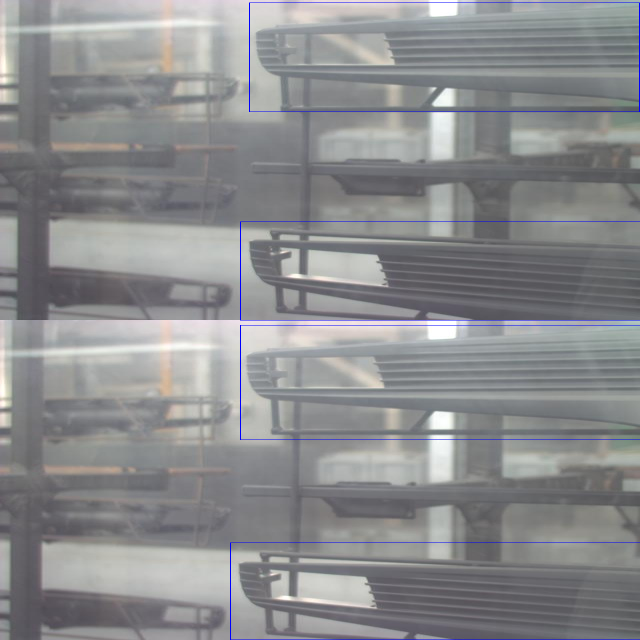

[[1, 240, 650, 640, 879], [1, 230, 1085, 640, 1279], [1, 249, 5, 639, 223], [1, 240, 443, 640, 640]]


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load two images using OpenCV
img1 = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/valid/images/Data_1-01_jpg.rf.3b45a63fda6bb114cf2e00746066fc10.jpg")
img2 = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/valid/images/Data_1-07_jpg.rf.551aee07c20621be69b83691813332d4.jpg")

# Vertically stitch images
stitched_img = np.vstack((img1, img2))
print(img1.shape,img2.shape,stitched_img.shape)
# cv2_imshow( stitched_img)
Label_1="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/valid/labels/Data_1-01_jpg.rf.3b45a63fda6bb114cf2e00746066fc10.txt"
Label_2="/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/valid/labels/Data_1-07_jpg.rf.551aee07c20621be69b83691813332d4.txt"
L_above=[]
L_below=[]
with open(Label_1, 'r') as file:
    lines = file.readlines()
    for line in lines:
        L_above.append(line.strip())
with open(Label_2, 'r') as file:
    lines = file.readlines()
    for line in lines:
        L_below.append(line.strip())
print(L_above)
print(L_below)
 # strip() removes the newline character
D=[]
D=stitch_bb(L_below,stitched_img,True,D)
D=stitch_bb(L_above,stitched_img,False,D)
stitched_img=cv2.resize(stitched_img,(640,640))
cv2_imshow(stitched_img)
print(D)


In [ ]:
from PIL import Image

# Load images
img1 = Image.open("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/train/images/Data_1-00_jpg.rf.15163fb532db49ab9e5c2bba314daa55.jpg")
img2 = Image.open("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/train/images/Data_1-00_jpg.rf.8b3a48c661eb61877a001bba1dabf598.jpg")

# Image dimensions
width1, height1 = img1.size
width2, height2 = img2.size

# Load bounding boxes from the .txt file (normalized format)
# Format in text file: class_id center_x center_y width height
bboxes_img1 = [
    [1, 0.30390625, 0.18046875, 0.6078125, 0.34453125],  # For image 1
    [1, 0.3078125, 0.85859375, 0.615625, 0.2828125]     # For image 2
]

# Adjust image size after stitching
total_height = height1 + height2
max_width = max(width1, width2)

# Function to adjust bounding boxes for the second image
def adjust_bbox_for_stitching(bbox, height1, img_height, total_height):
    class_id, center_x, center_y, box_width, box_height = bbox

    # Convert normalized coordinates to absolute pixel values
    abs_center_y = center_y * img_height

    # Shift the bounding box for the second image vertically
    new_abs_center_y = abs_center_y + height1

    # Convert back to normalized format based on the new image size
    new_center_y_norm = new_abs_center_y / total_height

    return [class_id, center_x, new_center_y_norm, box_width, box_height]

# Adjust bounding boxes for the second image
bboxes_img2 = [
    [1, 0.30390625, 0.18046875, 0.6078125, 0.34453125],
    [1, 0.30390625, 0.18046875, 0.6078125, 0.34453125],# Example bounding boxes for image 2
]

# Adjust the bounding boxes for the second image
adjusted_bboxes_img2 = [
    adjust_bbox_for_stitching(bbox, height1, height2, total_height) for bbox in bboxes_img2
]

# Combine bounding boxes
combined_bboxes = bboxes_img1 + adjusted_bboxes_img2

# Stitch the images vertically
stitched_img = Image.new("RGB", (max_width, total_height))
stitched_img.paste(img1, (0, 0))
stitched_img.paste(img2, (0, height1))

# Save the stitched image
stitched_img.save("stitched_image.jpg")
stitched_img.show()

# Save the combined bounding boxes to a new text file
with open("stitched_bboxes.txt", "w") as f:
    for bbox in combined_bboxes:
        f.write(" ".join(map(str, bbox)) + "\n")

print("Bounding boxes for stitched image:", combined_bboxes)


Bounding boxes for stitched image: [[1, 0.30390625, 0.18046875, 0.6078125, 0.34453125], [1, 0.3078125, 0.85859375, 0.615625, 0.2828125], [1, 0.30390625, 0.590234375, 0.6078125, 0.34453125], [1, 0.30390625, 0.590234375, 0.6078125, 0.34453125]]


## RESULT TESTING

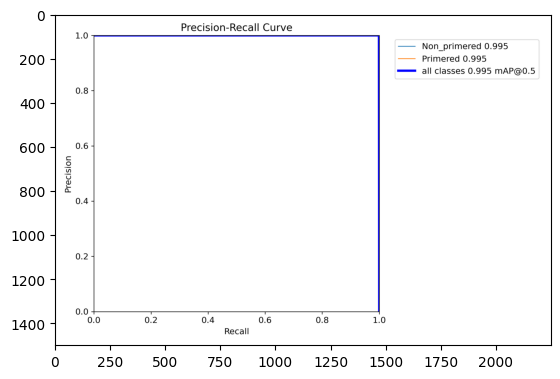

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image using mpimg.imread()
img = mpimg.imread("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V1/runs/detect/train3/PR_curve.png")

# Now display the image using plt.imshow()
plt.imshow(img)
plt.show()

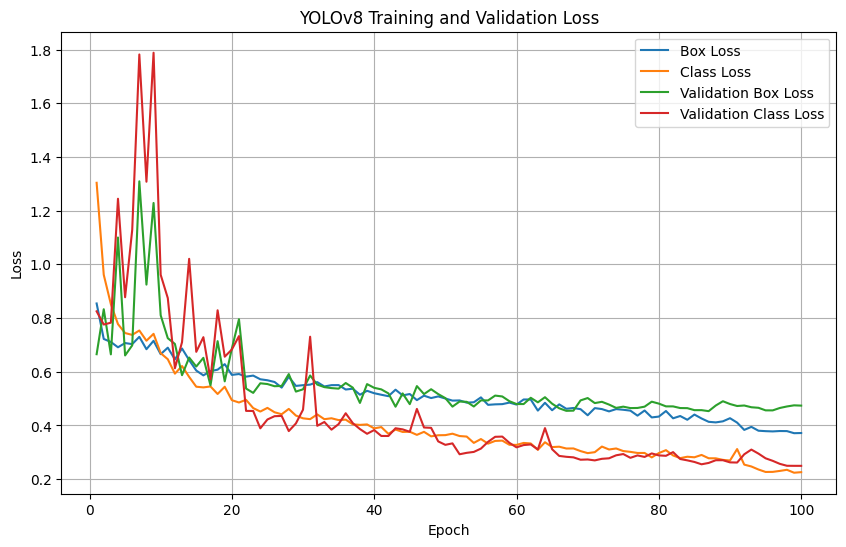

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the results.csv file from the YOLOv8 training
results = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/runs/detect/train/results.csv')

# Plot training and validation loss
results.columns = results.columns.str.strip()
plt.figure(figsize=(10, 6))
plt.plot(results['epoch'], results['train/box_loss'], label='Box Loss')
# plt.plot(results['epoch'], results['train/obj_loss'], label='Objectness Loss')
plt.plot(results['epoch'], results['train/cls_loss'], label='Class Loss')
plt.plot(results['epoch'], results['val/box_loss'], label='Validation Box Loss')
# plt.plot(results['epoch'], results['val/obj_loss'], label='Validation Objectness Loss')
plt.plot(results['epoch'], results['val/cls_loss'], label='Validation Class Loss')

# Add title and labels
plt.title('YOLOv8 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


# K-FOLD CROSS VALIDATION


In [2]:
!pip install -U ultralytics -q
!pip install -U scikit-learn pandas pyyaml -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 881.3/881.3 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 82.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 2.2.3 which is incompatible.


In [32]:
from pathlib import Path

dataset_path = Path("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3")  # replace with 'path/to/dataset' for your custom data
labels = sorted(dataset_path.rglob("*labels/*.txt"))  # all data in 'labels'

In [33]:
import yaml
yaml_file = "/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3/data.yaml"  # your data YAML with data directories and names dictionary
with open(yaml_file, "r", encoding="utf8") as y:
    classes = yaml.safe_load(y)["names"]
    print(classes)
sorted_classes = sorted(classes)
class_to_index = {cls: i for i, cls in enumerate(sorted_classes)}
cls_idx = [class_to_index[cls] for cls in classes]
print(cls_idx)

['Non_primered', 'Primered']
[0, 1]


In [34]:
import pandas as pd

indx = [label.stem for label in labels]  # uses base filename as ID (no extension)
labels_df = pd.DataFrame([], columns=cls_idx, index=indx)


In [35]:
from collections import Counter

for label in labels:
    lbl_counter = Counter()

    with open(label, "r") as lf:
        lines = lf.readlines()

    for line in lines:
        # classes for YOLO label uses integer at first position of each line
        lbl_counter[int(line.split(" ")[0])] += 1

    labels_df.loc[label.stem] = lbl_counter

labels_df = labels_df.fillna(0.0)  # replace `nan` values with `0.0`


<ipython-input-35-6f088342b013>:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_df = labels_df.fillna(0.0)  # replace `nan` values with `0.0`


In [36]:
labels_df.head(5)

,0,1
Data_3-06_jpg.rf.7e75dbc7b76981132d75b5eedd30a935,0.0,2.0
Data_4-09_jpg.rf.ab10d08da26be73adcbf4ed8c46232a1,0.0,1.0
Data_6-00_jpg.rf.3b9b98bcc43520a57b2c902cd608a9ee,0.0,2.0
Data_6-07_jpg.rf.9f3dc45bf3dd501a08a25f1d6b471d1f,0.0,2.0
RawData_1-02_jpg.rf.11c92250086f9457b26b8508208011c9,2.0,0.0


In [37]:
from sklearn.model_selection import KFold

ksplit = 5
kf = KFold(n_splits=ksplit, shuffle=True, random_state=20)  # setting random_state for repeatable results

kfolds = list(kf.split(labels_df))


In [38]:
print(kfolds)

[(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  14,  15,  17,  18,  19,  21,  22,  23,  24,  25,  26,  27,  30,  31,  33,  35,  36,  37,  38,  40,  41,  42,  43,  44,  45,  46,  48,  49,  50,  51,  52,  54,  55,  56,  57,  59,  60,  62,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,
        75,  76,  78,  79,  80,  82,  85,  86,  87,  88,  89,  91,  92,  93,  94,  95,  96,  97,  99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 114, 115, 116, 118, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 151,
       152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 165, 166, 167, 171, 172, 173, 175, 176, 178, 179, 180, 181, 183, 184, 185, 187, 188, 190, 191, 192, 193, 195, 196, 198, 199, 201, 202, 203, 204, 205, 206, 207, 210, 211, 213, 214, 216, 218, 219, 221, 222, 223, 224, 225, 227, 228, 229, 230, 231, 233, 234,
       235, 237, 238, 239, 240, 241, 242, 244, 

In [39]:
folds = [f"split_{n}" for n in range(1, ksplit + 1)]
folds_df = pd.DataFrame(index=indx, columns=folds)

for idx, (train, val) in enumerate(kfolds, start=1):
    folds_df[f"split_{idx}"].loc[labels_df.iloc[train].index] = "train"
    folds_df[f"split_{idx}"].loc[labels_df.iloc[val].index] = "val"

<ipython-input-39-5716dd6c148f>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  folds_df[f"split_{idx}"].loc[labels_df.iloc[train].index] = "train"
<ipython-input-39-5716dd6c148f>:6: FutureWarning: ChainedAssignmentError: behaviour will cha

In [40]:
fold_lbl_distrb = pd.DataFrame(index=folds, columns=cls_idx)

for n, (train_indices, val_indices) in enumerate(kfolds, start=1):
    train_totals = labels_df.iloc[train_indices].sum()
    val_totals = labels_df.iloc[val_indices].sum()

    # To avoid division by zero, we add a small value (1E-7) to the denominator
    ratio = val_totals / (train_totals + 1e-7)
    fold_lbl_distrb.loc[f"split_{n}"] = ratio


In [41]:
fold_lbl_distrb.head(5)

,0,1
split_1,0.291429,0.239544
split_2,0.208556,0.253846
split_3,0.215054,0.244275
split_4,0.255556,0.268482
split_5,0.284091,0.244275


In [62]:
import datetime

# supported_extensions = [".jpg", ".jpeg", ".png"]

# Initialize an empty list to store image file paths
images = []

# Loop through supported extensions and gather image files
dataset_path=Path("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3")
print(dataset_path)
print(images)
for ext in supported_extensions:
    matched_images = sorted((dataset_path / "images").rglob(f"*{ext}"))
    print(f"Matching {ext} images: ", matched_images)
    images.extend(matched_images)
print(images)
# Create the necessary directories and dataset YAML files (unchanged)
dataset_path=Path("/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3")
save_path = Path(dataset_path / f"{datetime.date.today().isoformat()}_{ksplit}-Fold_Cross-val")
save_path.mkdir(parents=True, exist_ok=True)
ds_yamls = []

for split in folds_df.columns:
    # Create directories
    split_dir = save_path / split
    split_dir.mkdir(parents=True, exist_ok=True)
    (split_dir / "train" / "images").mkdir(parents=True, exist_ok=True)
    (split_dir / "train" / "labels").mkdir(parents=True, exist_ok=True)
    (split_dir / "val" / "images").mkdir(parents=True, exist_ok=True)
    (split_dir / "val" / "labels").mkdir(parents=True, exist_ok=True)

    # Create dataset YAML files
    dataset_yaml = split_dir / f"{split}_dataset.yaml"
    print(dataset_yaml)
    ds_yamls.append(dataset_yaml)

    with open(dataset_yaml, "w") as ds_y:
        yaml.safe_dump(
            {
                "path": split_dir.as_posix(),
                "train": "train",
                "val": "val",
                "names": classes,
            },
            ds_y,
        )


/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V2/finishing_detection-3
[]
Matching .jpg images:  []
Matching .jpeg images:  []
Matching .png images:  []
[]
/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_1/split_1_dataset.yaml
/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_2/split_2_dataset.yaml
/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_3/split_3_dataset.yaml
/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_4/split_4_dataset.yaml
/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_5/split_5_dataset.yaml


In [60]:
print(images)

[]


In [50]:
import shutil

for image, label in zip(images, labels):
    for split, k_split in folds_df.loc[image.stem].items():
        # Destination directory
        img_to_path = save_path / split / k_split / "images"
        lbl_to_path = save_path / split / k_split / "labels"

        # Copy image and label files to new directory (SamefileError if file already exists)
        shutil.copy(image, img_to_path / image.name)
        shutil.copy(label, lbl_to_path / label.name)


In [51]:
folds_df.to_csv(save_path / "kfold_datasplit.csv")
fold_lbl_distrb.to_csv(save_path / "kfold_label_distribution.csv")

In [52]:
from ultralytics import YOLO
weights_path  = "/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V1/runs/detect/train3/weights/best.pt"
# weights_path = "path/to/weights.pt"
model = YOLO(weights_path, task="detect")

In [57]:
results = {}

# Define your additional arguments here
batch = 16
project = "/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/kfold_demo"
epochs = 10

for k in range(ksplit):
    dataset_yaml = ds_yamls[k]
    print(dataset_yaml)
    model.train(data=dataset_yaml, epochs=epochs, batch=batch, project=project)  # include any train arguments
    results[k] = model.metrics  # save output metrics for further analysis


/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_1/split_1_dataset.yaml
Ultralytics 8.3.0 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V1/runs/detect/train3/weights/best.pt, data=/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_1/split_1_dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/kfold_demo, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=va

FileNotFoundError: [34m[1mtrain: [0mError loading data from /content/drive/MyDrive/Colab_Notebooks/Machine_finishing/model_V3/2024-09-30_5-Fold_Cross-val/split_1/train
See https://docs.ultralytics.com/datasets for dataset formatting guidance.